# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# **EDA** (Exploratory Data Analysis)

In [2]:
df = pd.read_csv("Customer Data.csv")
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# profile

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

In [12]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [13]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

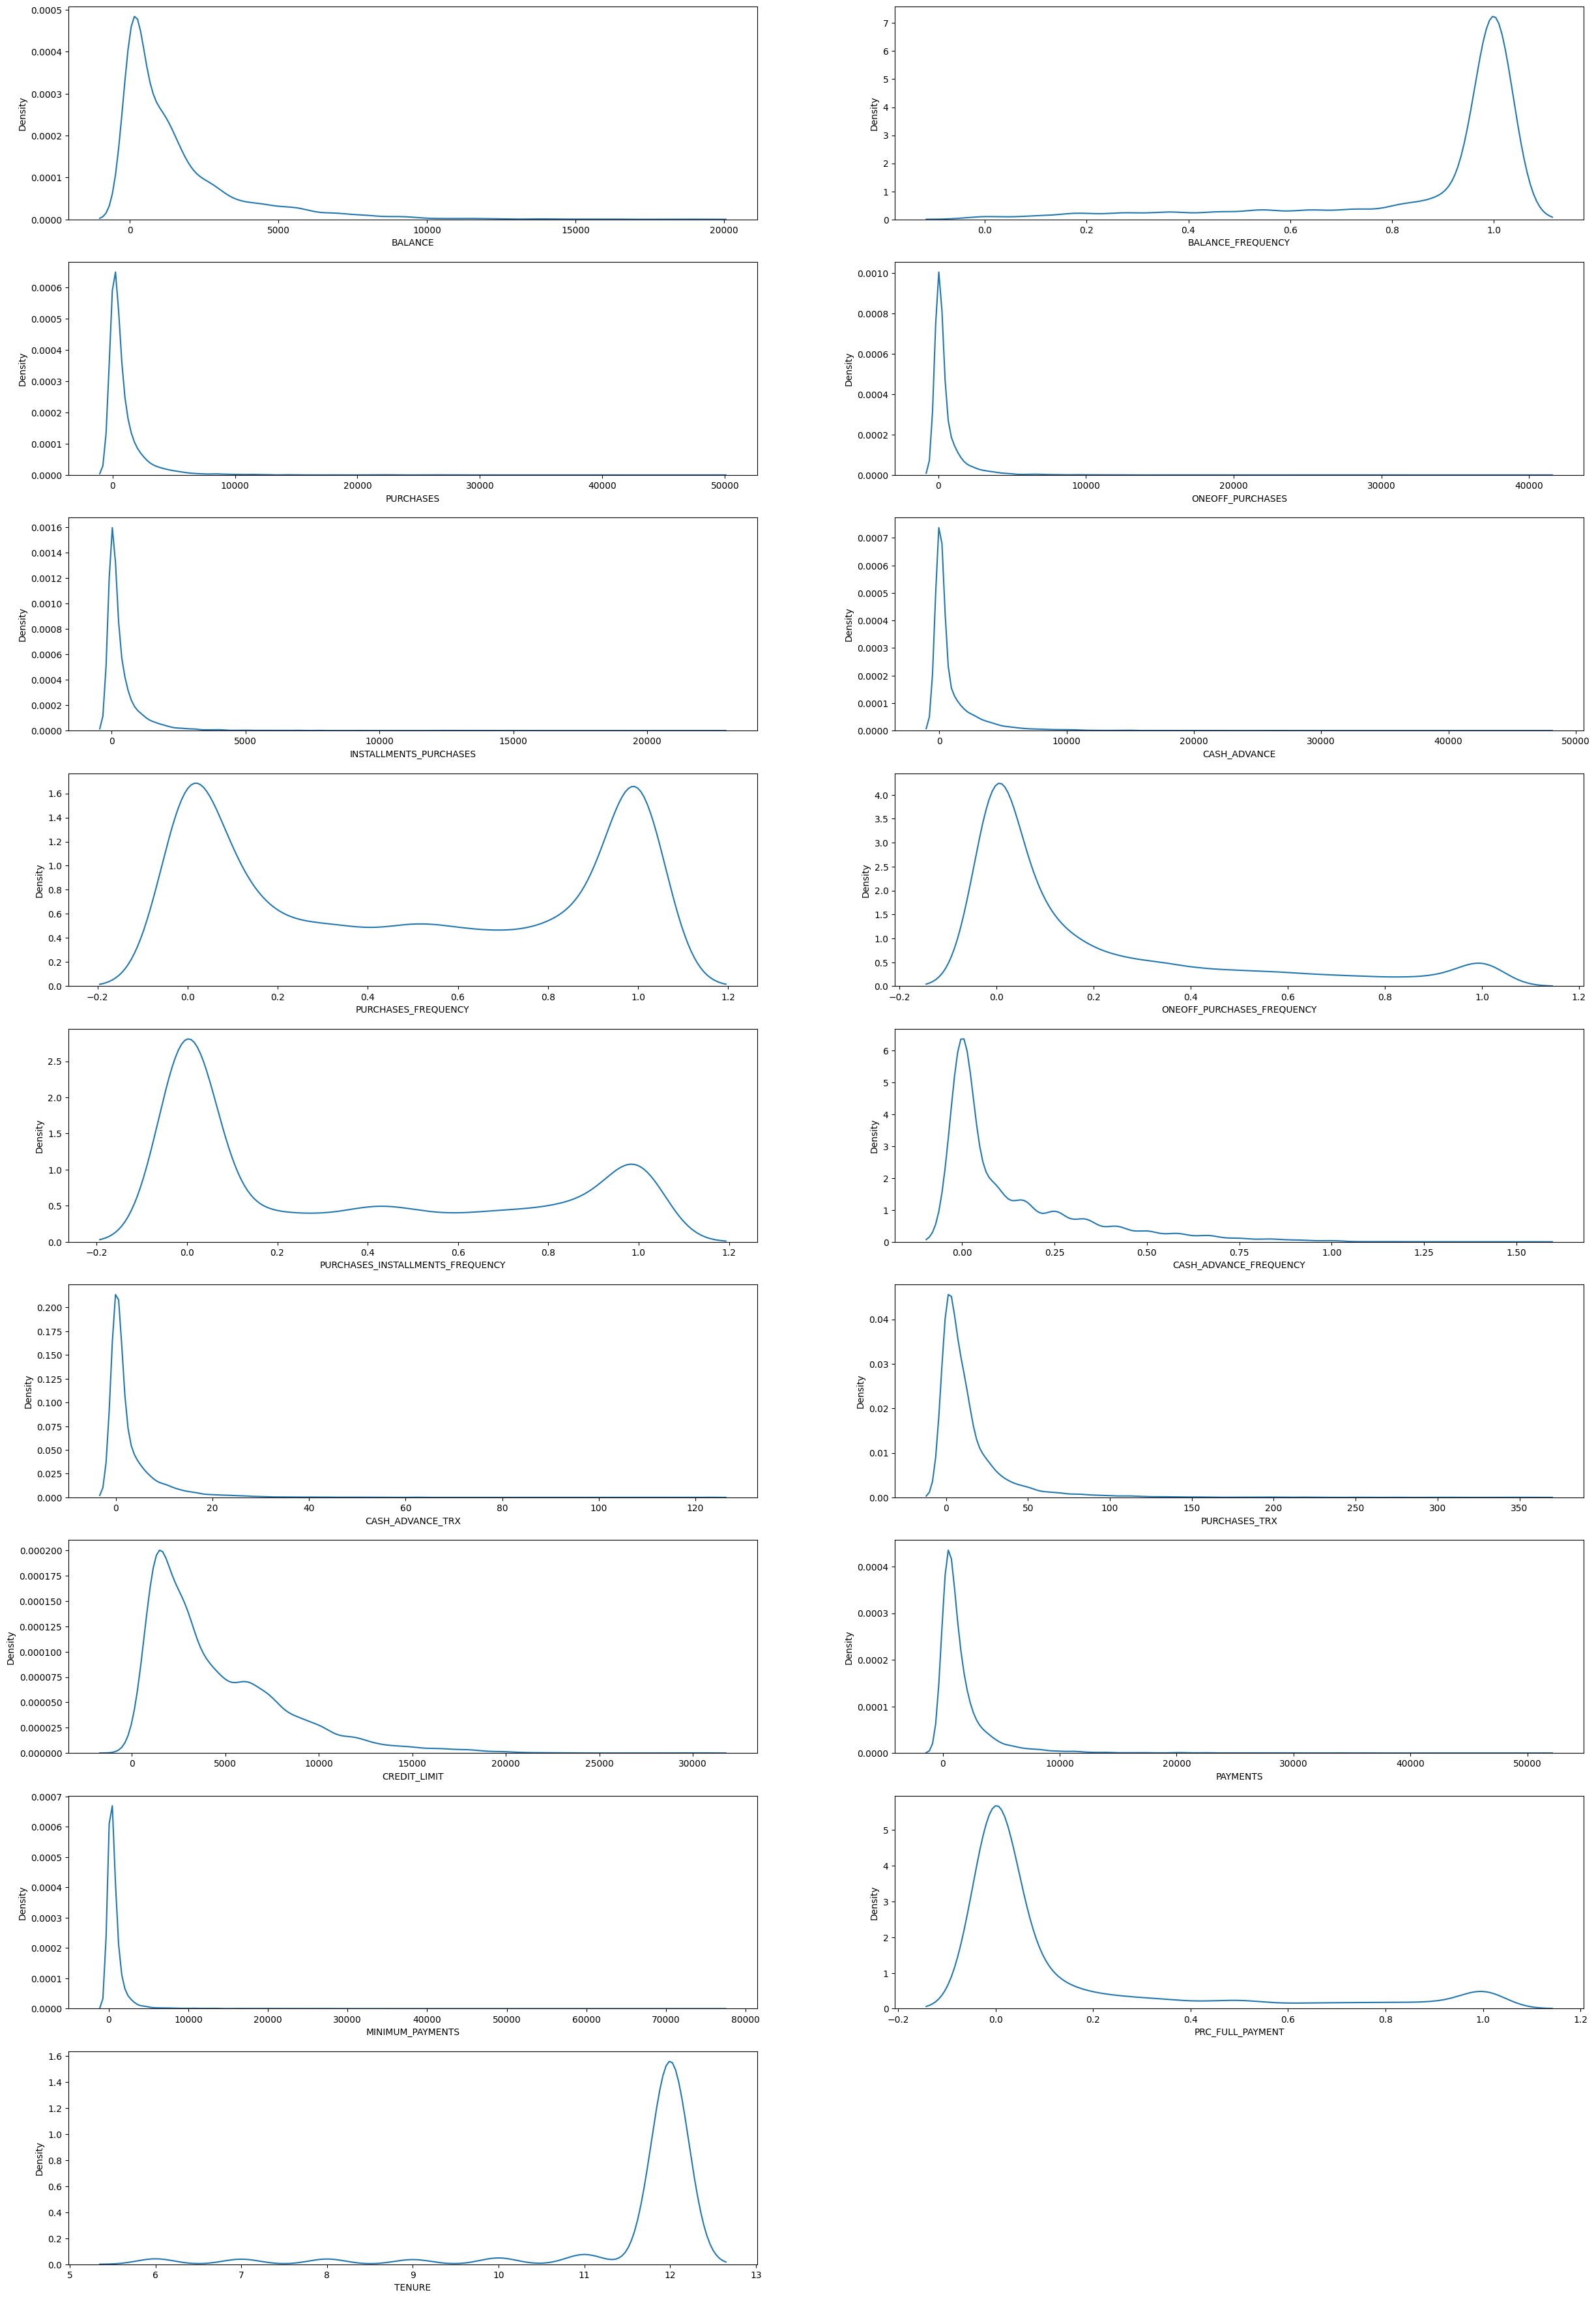

In [14]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
plt.show()

KeyboardInterrupt: 

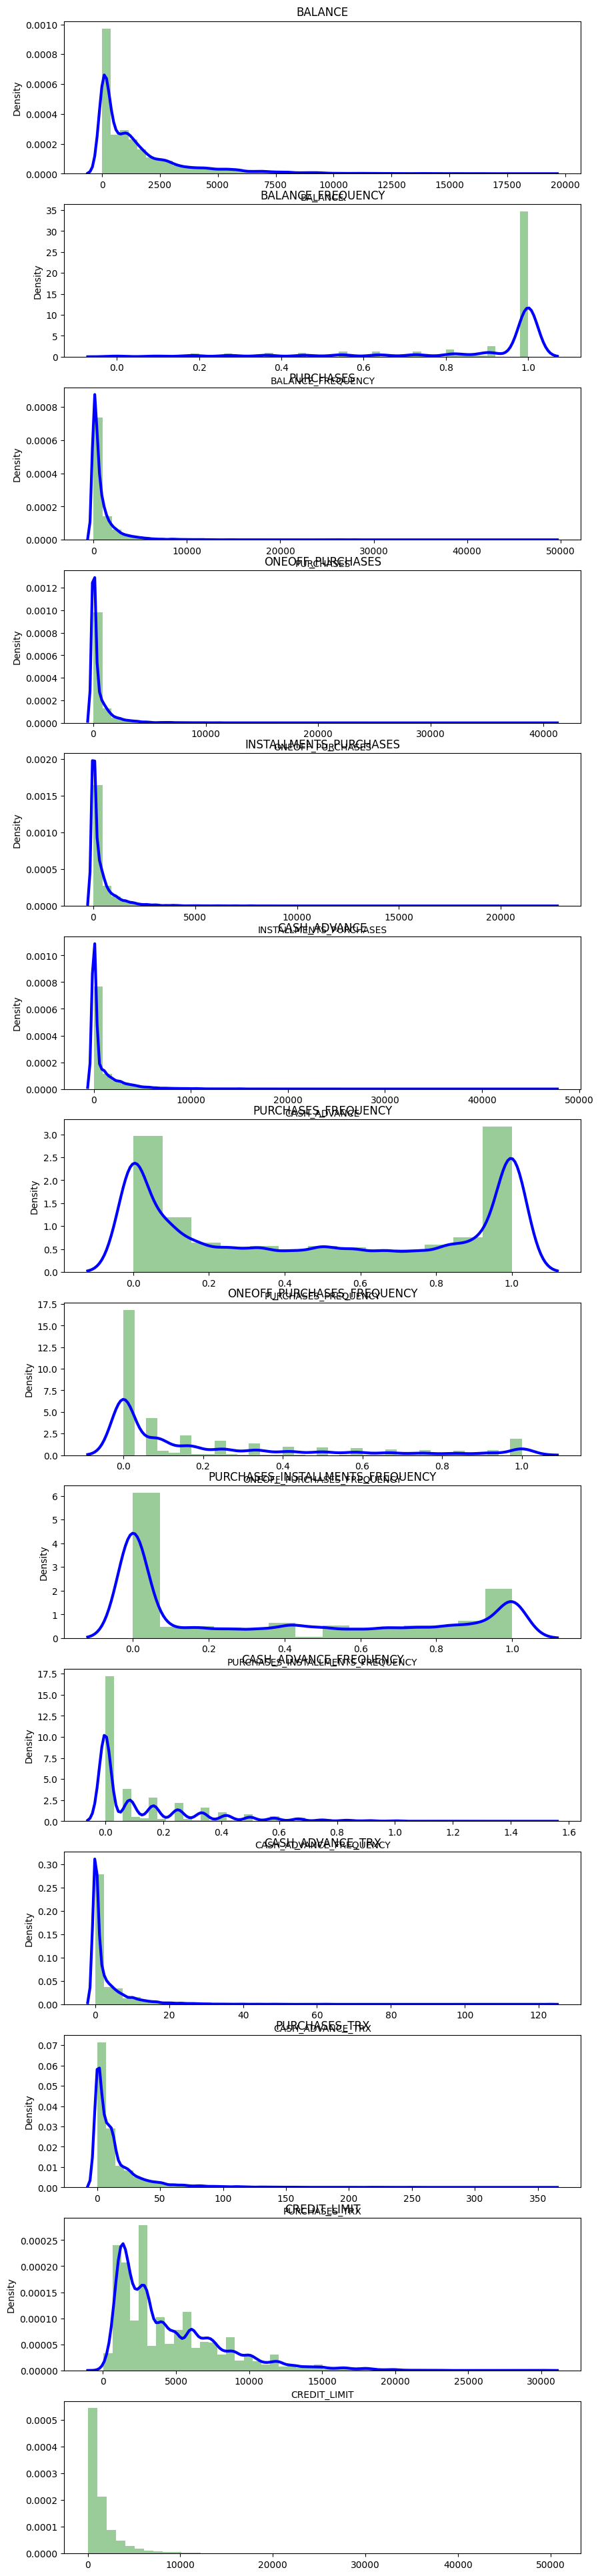

In [15]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

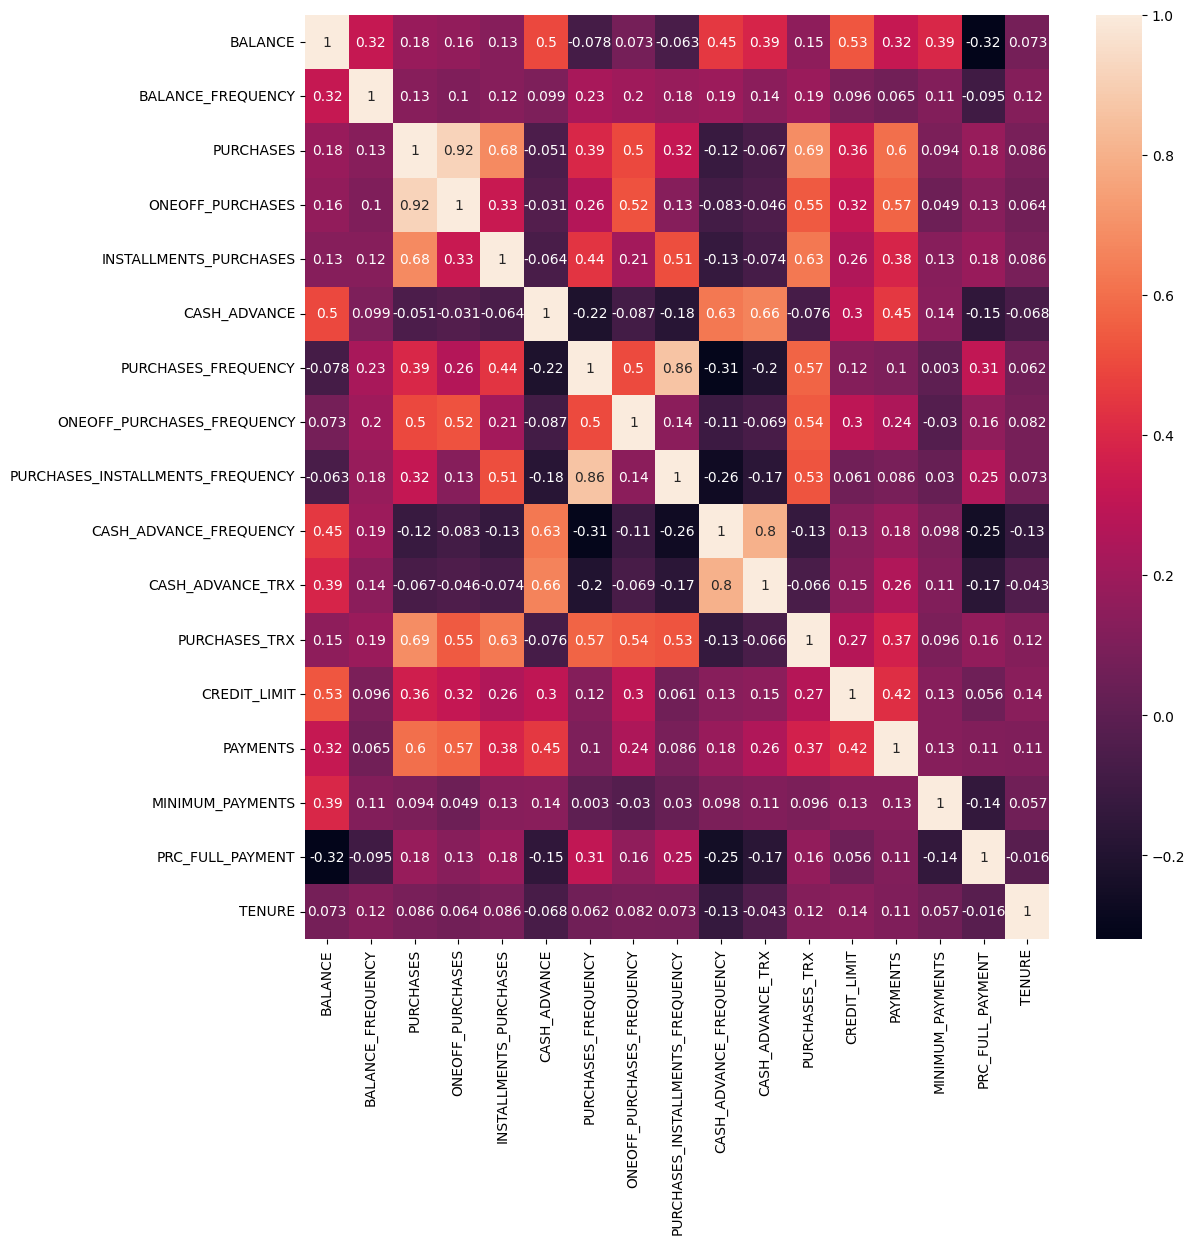

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# قائمة الأعمدة المراد حذفها (التي لها ارتباط عالي مع غيرها)
columns_to_remove = ['ONEOFF_PURCHASES', 'CASH_ADVANCE_TRX', 'PURCHASES_INSTALLMENTS_FREQUENCY']

# حذف الأعمدة مباشرة من البيانات الأصلية
df.drop(columns=columns_to_remove, inplace=True)

# التحقق من النتيجة
print( df.shape)

print(df.columns.tolist())

(8950, 14)
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


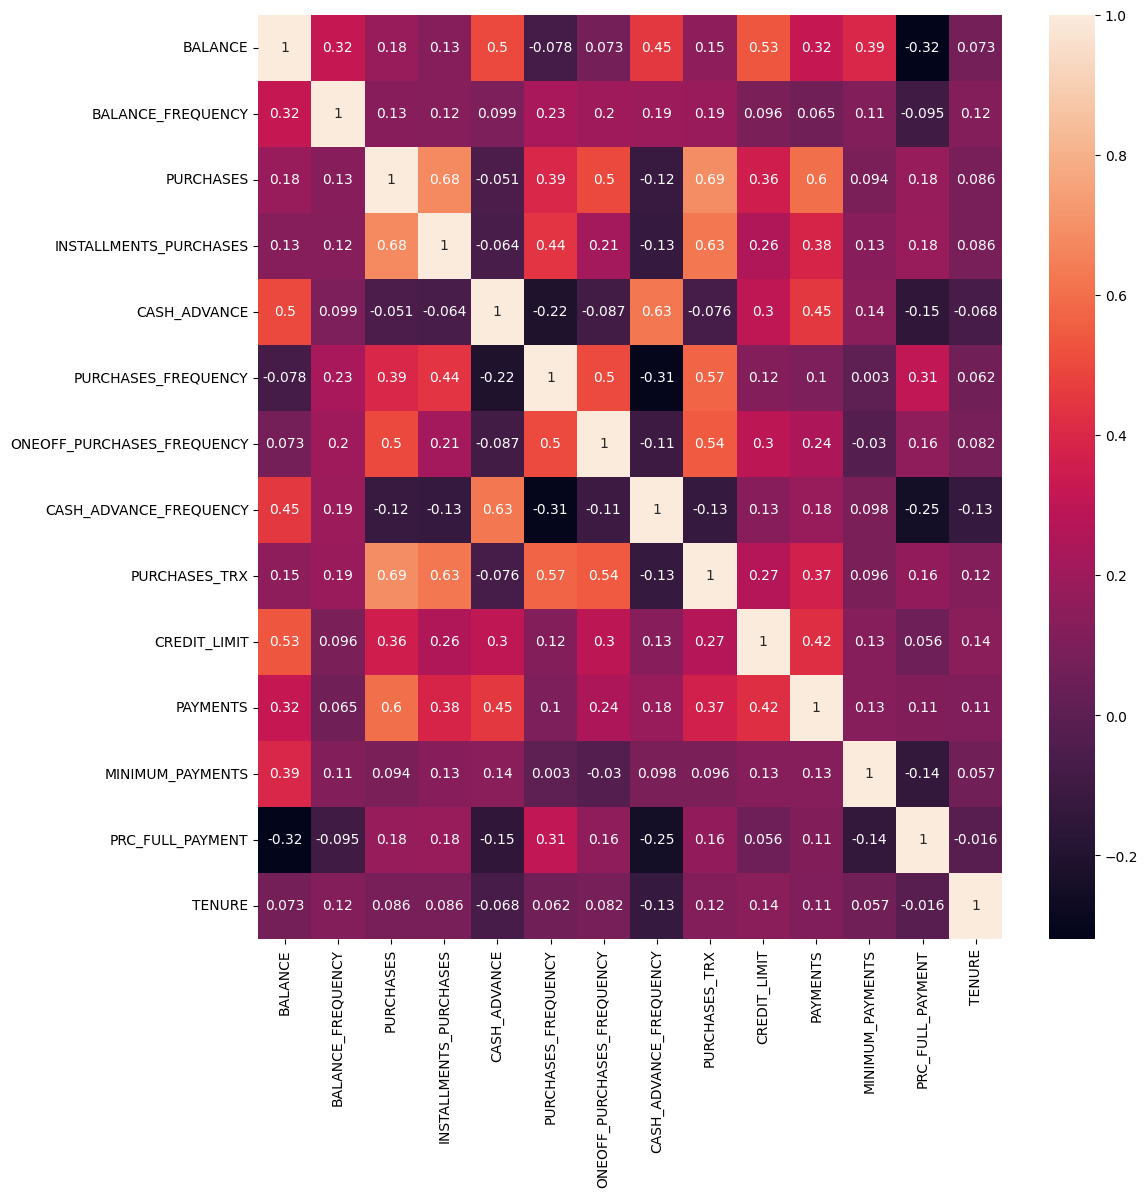

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Scaling the DataFrame
scaled_df = scalar.fit_transform(df)

---
# **Segmentation (Clustering)**
*   **DBScan Clustering** (76%)
*   **Hierarchical Clustering** (38%)
*   **K-means Clustering** (51%)
---

# **DBScan Clustering**

In [ ]:
#  from sklearn.cluster import DBSCAN
#  minPts = df.shape[1] + 1

#  db = DBSCAN(eps=0.2, min_samples=minPts).fit(pca_df)
#  ld=db.labels_

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
       'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# 1. تطبيع البيانات
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

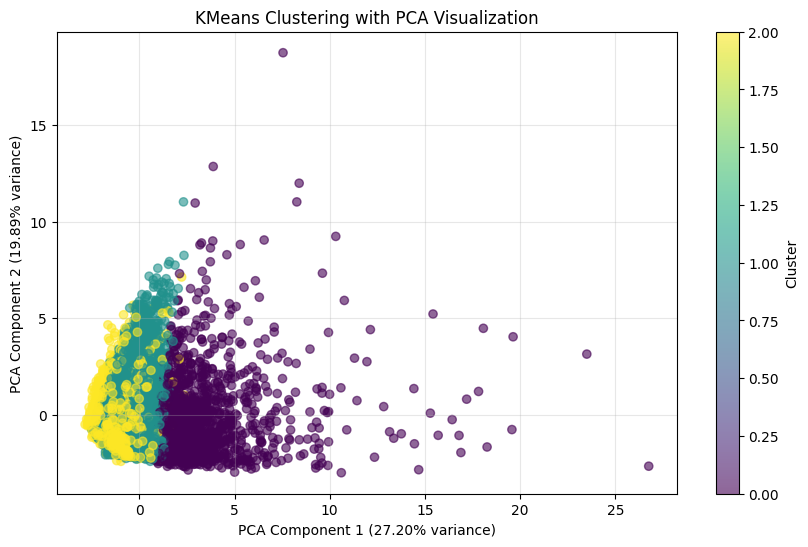

Percentage of variance explained by each component:
PCA Component 1: 27.20%
PCA Component 2: 19.89%
Total variance explained: 47.09%


In [ ]:

# 2. تقليل الأبعاد إلى 2 باستخدام PCA للتصوير فقط
pca = PCA(n_components=2)  # استخدام بعدين فقط للرسم
principal_components = pca.fit_transform(scaled_data)

# إنشاء DataFrame للنتائج
pca_df = pd.DataFrame(data=principal_components,
                     columns=['PCA Component 1', 'PCA Component 2'])

# 3. تطبيق KMeans على البيانات الأصلية (المطابقة) وليس على PCA
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 4. إضافة نتائج التجميع إلى DataFrame
pca_df['Cluster'] = clusters

# 5. تصوير النتائج بشكل صحيح
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PCA Component 1'],
                     pca_df['PCA Component 2'],
                     c=pca_df['Cluster'],
                     cmap='viridis',
                     alpha=0.6)

plt.xlabel('PCA Component 1 ({:.2f}% variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PCA Component 2 ({:.2f}% variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('KMeans Clustering with PCA Visualization')
plt.colorbar(scatter, label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# 6. طباعة نسبة التباين الموضحة
print("Percentage of variance explained by each component:")
print("PCA Component 1: {:.2f}%".format(pca.explained_variance_ratio_[0]*100))
print("PCA Component 2: {:.2f}%".format(pca.explained_variance_ratio_[1]*100))
print("Total variance explained: {:.2f}%".format(sum(pca.explained_variance_ratio_)*100))

In [ ]:
# score = silhouette_score(df, ld)
# print("Silhouette Score:", score)

In [ ]:
# cluster_df_DBScan = pd.concat([df,pd.DataFrame({'Cluster':ld})],axis=1)
# cluster_df_DBScan.head(20)

In [ ]:
# print("Unique Clusters:", cluster_df_DBScan["Cluster"].unique())
# print("Cluster Counts:\n", cluster_df_DBScan["Cluster"].value_counts())

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# pca_3d = PCA(n_components=3)
# principal_components_3d = pca_3d.fit_transform(scaled_data)

# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(principal_components_3d[:, 0],
#                     principal_components_3d[:, 1],
#                     principal_components_3d[:, 2],
#                     c=clusters, cmap='viridis', alpha=0.6)

# ax.set_xlabel('PCA 1 ({:.1f}%)'.format(pca_3d.explained_variance_ratio_[0]*100))
# ax.set_ylabel('PCA 2 ({:.1f}%)'.format(pca_3d.explained_variance_ratio_[1]*100))
# ax.set_zlabel('PCA 3 ({:.1f}%)'.format(pca_3d.explained_variance_ratio_[2]*100))
# plt.title('3D PCA Visualization')
# plt.colorbar(scatter)
# plt.show()

# print("Total variance explained (3 components): {:.2f}%".format(
#     sum(pca_3d.explained_variance_ratio_[:3])*100))

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Set the style for better visuals
# plt.style.use('seaborn-v0_8')
# sns.set_palette("husl")

# # Get the list of numeric columns
# numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# # Calculate the number of rows and columns for subplots
# n_cols = 3
# n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# # Create subplots
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
# axes = axes.flatten()  # Flatten the 2D array of axes

# # Plot distribution for each numeric column
# for i, column in enumerate(numeric_columns):
#     if i < len(axes):
#         # Histogram with KDE
#         sns.histplot(df[column], kde=True, ax=axes[i], bins=30, alpha=0.7)

#         # Add vertical line for mean and median
#         axes[i].axvline(df[column].mean(), color='red', linestyle='--',
#                        label=f'Mean: {df[column].mean():.2f}')
#         axes[i].axvline(df[column].median(), color='green', linestyle='--',
#                        label=f'Median: {df[column].median():.2f}')

#         axes[i].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold')
#         axes[i].set_xlabel(column, fontsize=12)
#         axes[i].set_ylabel('Frequency', fontsize=12)
#         axes[i].legend()

#         # Add statistics in the plot
#         stats_text = f'Skew: {df[column].skew():.2f}\nKurtosis: {df[column].kurtosis():.2f}'
#         axes[i].text(0.65, 0.75, stats_text, transform=axes[i].transAxes,
#                     bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# # Hide any empty subplots
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()

# # Additional: Boxplots for outlier detection
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
# axes = axes.flatten()

# for i, column in enumerate(numeric_columns):
#     if i < len(axes):
#         sns.boxplot(y=df[column], ax=axes[i])
#         axes[i].set_title(f'Boxplot of {column}', fontsize=14, fontweight='bold')
#         axes[i].set_ylabel(column, fontsize=12)

# # Hide any empty subplots
# for j in range(i + 1, len(axes)):
#     axes[j].set_visible(False)

# plt.tight_layout()
# plt.show()

# # Print basic statistics
# print("📊 BASIC STATISTICS FOR EACH COLUMN:")
# print("=" * 50)
# for column in numeric_columns:
#     print(f"\n{column}:")
#     print(f"   Mean: {df[column].mean():.2f}")
#     print(f"   Median: {df[column].median():.2f}")
#     print(f"   Std: {df[column].std():.2f}")
#     print(f"   Min: {df[column].min():.2f}")
#     print(f"   Max: {df[column].max():.2f}")
#     print(f"   Skewness: {df[column].skew():.2f}")
#     print(f"   Kurtosis: {df[column].kurtosis():.2f}")

# **Hierarchical** **Clustering**

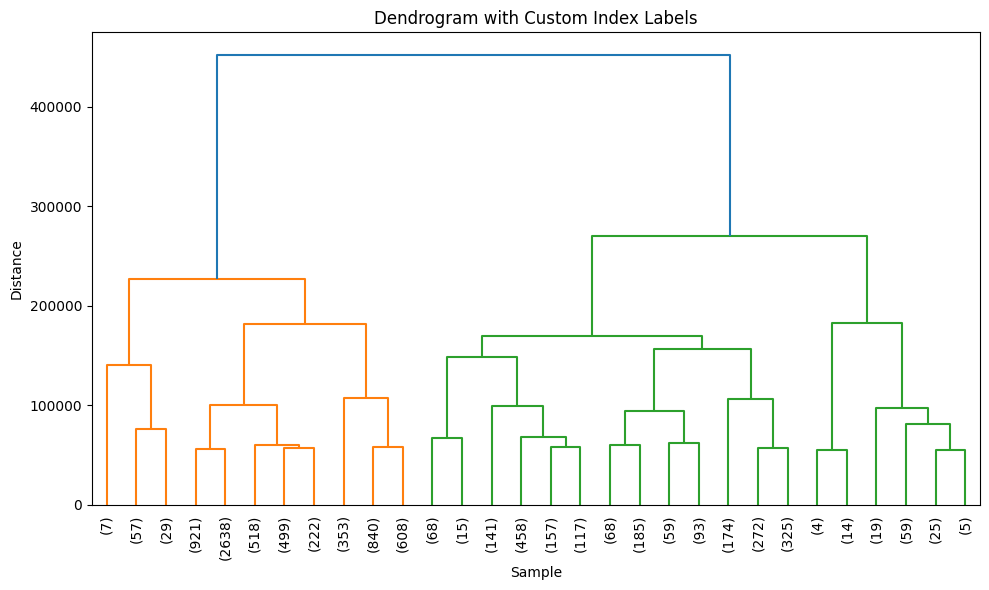

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(df, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, leaf_rotation=90, truncate_mode='lastp', p=30)
plt.title('Dendrogram with Custom Index Labels')
plt.xlabel('Sample')
plt.ylabel('Distance') # level of similarity
plt.tight_layout()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

labels = fcluster(linked, t=4, criterion='maxclust')

# score = silhouette_score(scaled_df, labels) # Scaling -> 77 ❎❎❎❎
score = silhouette_score(df, labels) # 88
print("Silhouette Score:", score)

Silhouette Score: 0.46228831500819223


In [ ]:
# # Creating a target column "Cluster" for storing the cluster segment
# cluster_df = df.copy()
# cluster_df["Cluster"] = labels

cluster_df_Hirarchical = pd.concat([df,pd.DataFrame({'Cluster':labels})],axis=1)
cluster_df_Hirarchical.head(20)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.000000,12,2
6,627.260806,1.000000,7091.01,688.38,0.000000,1.000000,1.000000,0.000000,64,13500.0,6354.314328,198.065894,1.000000,12,3
7,1823.652743,1.000000,436.20,436.20,0.000000,1.000000,0.000000,0.000000,12,2300.0,679.065082,532.033990,0.000000,12,2
8,1014.926473,1.000000,861.49,200.00,0.000000,0.333333,0.083333,0.000000,5,7000.0,688.278568,311.963409,0.000000,12,2
9,152.225975,0.545455,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,3,11000.0,1164.770591,100.302262,0.000000,12,3


In [ ]:
print("Unique Clusters:", cluster_df_Hirarchical["Cluster"].unique())
print("Cluster Counts:\n", cluster_df_Hirarchical["Cluster"].value_counts())

Unique Clusters: [2 3 1 4]
Cluster Counts:
 Cluster
2    6599
3    2132
4     126
1      93
Name: count, dtype: int64


# **K-means Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# نختار الأعمدة الرقمية فقط
numeric_features = df.select_dtypes(include=['int64','float64'])

# Standardize البيانات
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

# KMeans clustering (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1- Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["Cluster_Label"], errors="ignore"))
# نحسب متوسط كل عمود لكل cluster
cluster_summary = df.groupby('Cluster').mean()

print(cluster_summary)  # شوف المتوسطات لتحديد نوع العميل



             BALANCE  BALANCE_FREQUENCY    PURCHASES  INSTALLMENTS_PURCHASES  \
Cluster                                                                        
0        1986.992657           0.982287  3832.938714             1375.694435   
1         825.194895           0.842063   482.635607              251.123578   
2         794.449232           0.774384   408.581630              168.013068   
3        4590.695482           0.967888   482.091971              183.327397   

         CASH_ADVANCE  PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster                                                                  
0          403.540465             0.948543                    0.695409   
1          349.379579             0.436993                    0.109254   
2         1013.280741             0.421982                    0.121745   
3         4166.608329             0.262995                    0.109505   

         CASH_ADVANCE_FREQUENCY  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS 

In [ ]:
print(kmeans.cluster_centers_)


[[ 0.20299542  0.44330941  1.32446219  1.06672567 -0.2743528   1.14163295
   1.6524264  -0.37145499  1.49377025  0.80826613  0.69285031  0.02089079
   0.51987465  0.31659922]
 [-0.35536192 -0.14874643 -0.24361219 -0.17682236 -0.30017361 -0.13274717
  -0.31236186 -0.29758724 -0.25543187 -0.34011534 -0.27416286 -0.13270947
  -0.04056283  0.28395206]
 [-0.36995283 -0.43432318 -0.27831449 -0.26878017  0.01640861 -0.17034593
  -0.27055635  0.28984811 -0.374161   -0.56497683 -0.39029497 -0.20994254
   0.06778446 -3.01009473]
 [ 1.4533086   0.38262876 -0.2440775  -0.25199736  1.51871279 -0.56697166
  -0.31186298  1.46069091 -0.32185284  0.85718426  0.61151118  0.64023365
  -0.41995509  0.14662023]]


In [ ]:
# Example of assigning labels to each cluster based on the analysis of the averages
cluster_label_mapping = {
    0: "High Purchasers",           # Customers with many transactions
    1: "Inactive / Low-Value Customers",          # Customers with low transactions
    2: "New Customers / Low Engagement",          # Regular customers
    3: "Cash Advance Users" # Customers who pay installments regularly
}

df['Cluster_Label'] = df['Cluster'].map(cluster_label_mapping)

print(df[['Cluster', 'Cluster_Label']].head())


   Cluster                   Cluster_Label
0        1  Inactive / Low-Value Customers
1        3              Cash Advance Users
2        0                 High Purchasers
3        1  Inactive / Low-Value Customers
4        1  Inactive / Low-Value Customers


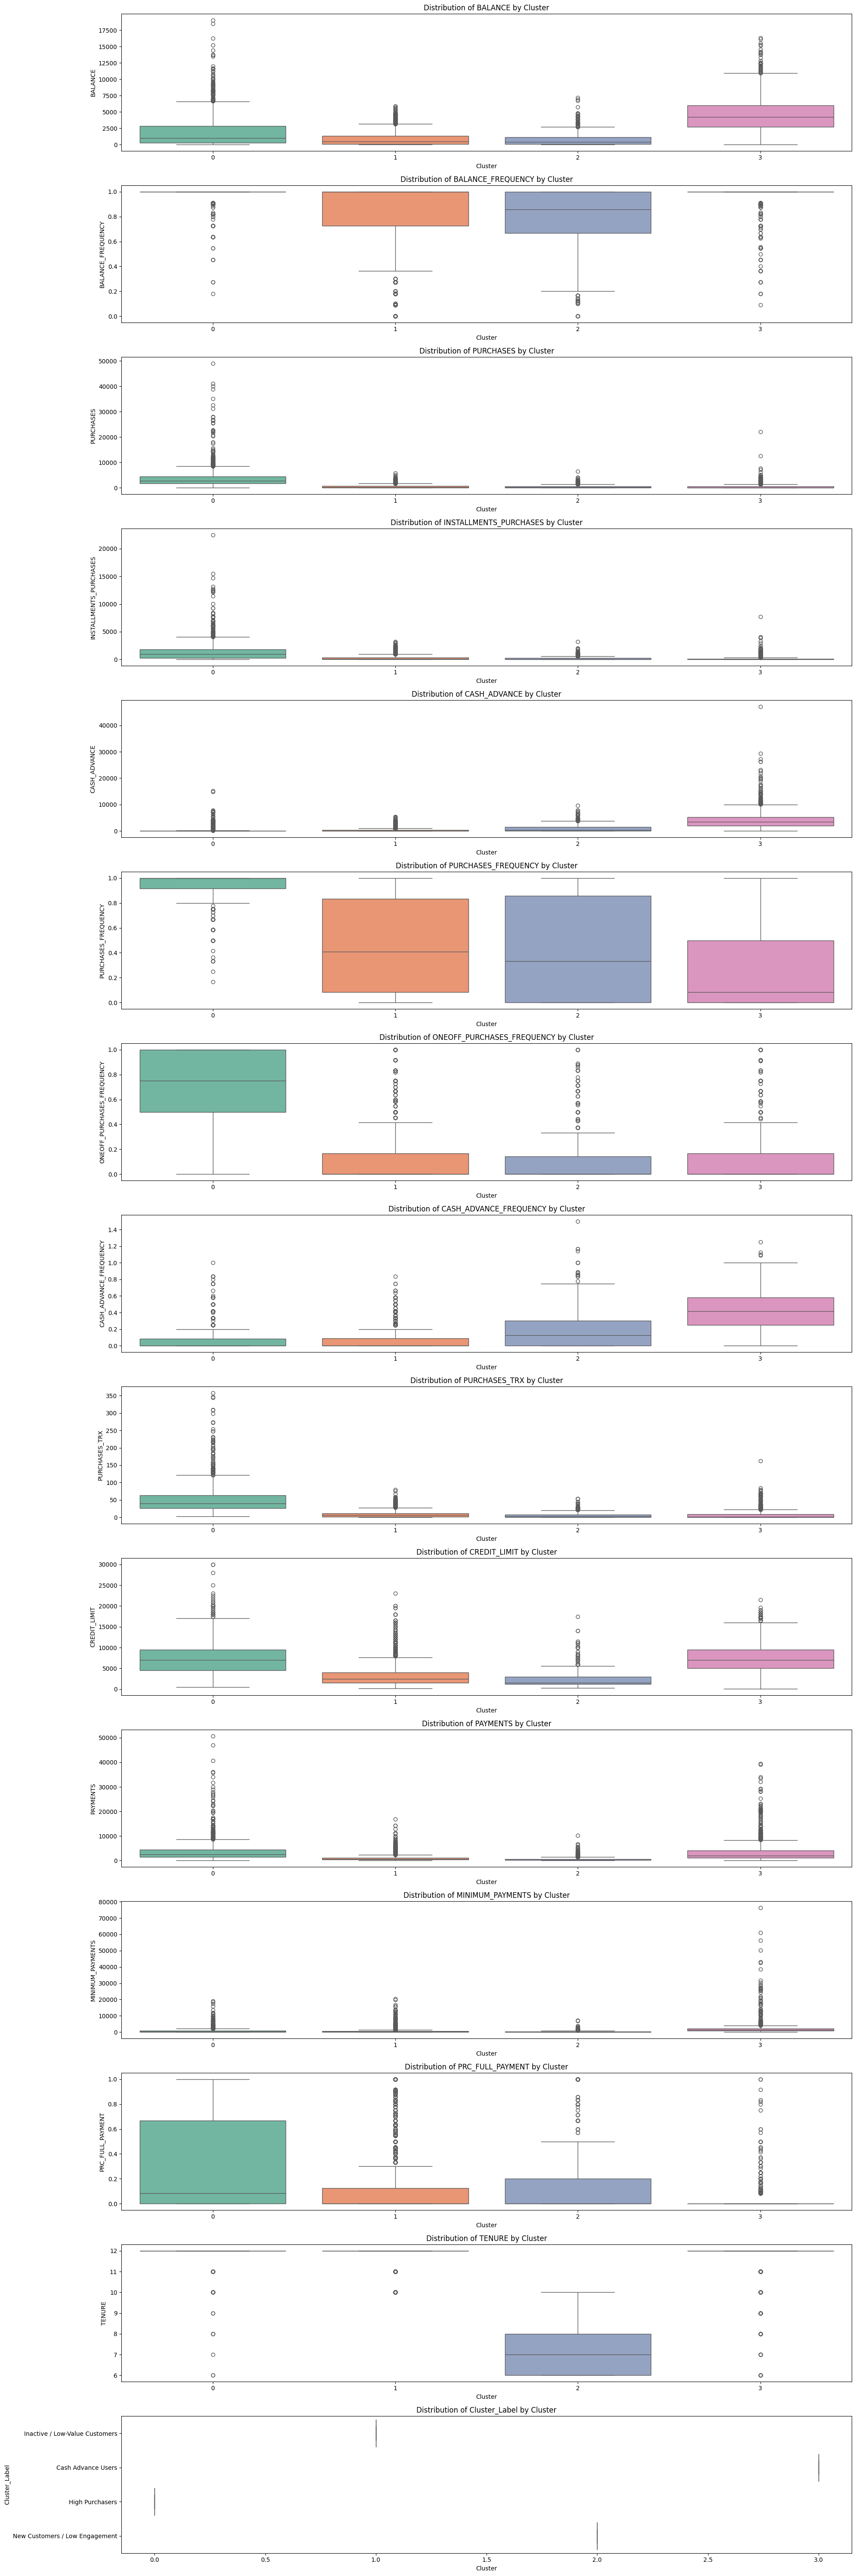

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# تأكد إن عندك عمود الكلاسترز
assert "Cluster" in df.columns, "لازم يكون في عمود اسمه Cluster في الداتا"

# نحدد كل الـ Features ماعدا عمود الكلاستر
features = [col for col in df.columns if col != "Cluster"]

# ===== Boxplots =====
plt.figure(figsize=(20, len(features)*4))
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x="Cluster", y=feature, data=df, palette="Set2")
    plt.title(f"Distribution of {feature} by Cluster")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features
X = df.drop(columns=['Cluster', 'Cluster_Label'])
y = df['Cluster_Label']

# تحويل النصوص لأرقام
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# النتائج
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9620111731843576
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       252
           1       0.96      0.93      0.94       301
           2       0.97      0.98      0.98      1094
           3       0.99      0.95      0.97       143

    accuracy                           0.96      1790
   macro avg       0.96      0.94      0.95      1790
weighted avg       0.96      0.96      0.96      1790



In [ ]:
df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,Cluster_Label
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12,1,Inactive / Low-Value Customers
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12,3,Cash Advance Users
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12,0,High Purchasers
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,1,7500.0,0.000000,864.206542,0.000000,12,1,Inactive / Low-Value Customers
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12,1,Inactive / Low-Value Customers
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.000000,12,1,Inactive / Low-Value Customers
6,627.260806,1.000000,7091.01,688.38,0.000000,1.000000,1.000000,0.000000,64,13500.0,6354.314328,198.065894,1.000000,12,0,High Purchasers
7,1823.652743,1.000000,436.20,436.20,0.000000,1.000000,0.000000,0.000000,12,2300.0,679.065082,532.033990,0.000000,12,1,Inactive / Low-Value Customers
8,1014.926473,1.000000,861.49,200.00,0.000000,0.333333,0.083333,0.000000,5,7000.0,688.278568,311.963409,0.000000,12,1,Inactive / Low-Value Customers
9,152.225975,0.545455,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,3,11000.0,1164.770591,100.302262,0.000000,12,1,Inactive / Low-Value Customers


<Axes: xlabel='Cluster_Label', ylabel='count'>

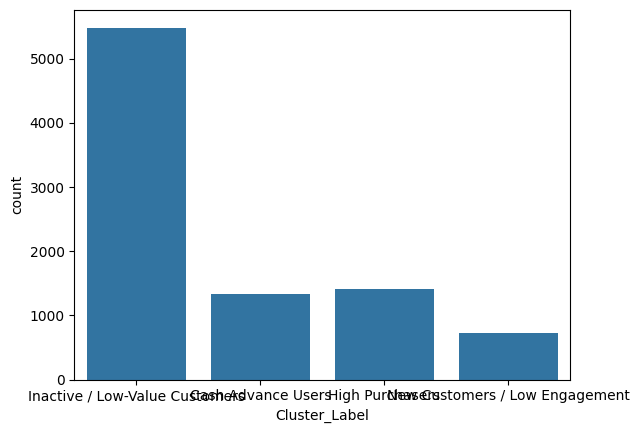

In [ ]:
#Visualization
sns.countplot(x='Cluster_Label', data=df)


In [ ]:
# Saving Scikitlearn models
# Saving the kmeans clustering model and the data with cluster label

import joblib
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']

In [ ]:
df.to_csv("Clustered_Customer_Data.csv")

---
# **Classification**


*   **Random Forest** (96%)
*   **Decision Tree Classifier** (93%)
*   **Logistic Regression** (82%)
*   **SVM "Support Vector Machine"** (80%)
*   **KNN "K-Nearest Neighbors"** (78%)
---

# **Random Forest**

In [ ]:
# Split Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features (كل الأعمدة ما عدا Cluster_Label)
X = df.drop(columns=["Cluster", "Cluster_Label"])
# Target
y = df["Cluster_Label"]

# نحول النصوص لأرقام
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# تقسيم البيانات Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7055,166.514439,0.777778,503.92,133.62,0.000000,0.777778,0.444444,0.000000,14,2500.0,142.308045,130.127411,0.000000,9
4580,3261.241461,1.000000,0.00,0.00,154.672040,0.000000,0.000000,0.083333,0,6500.0,800.677168,1588.441785,0.000000,12
8545,528.463885,1.000000,0.00,0.00,5191.738847,0.000000,0.000000,0.833333,0,1000.0,4736.808799,309.547058,0.833333,12
4463,24.831137,0.636364,1909.13,1879.13,0.000000,0.916667,0.083333,0.000000,12,2000.0,1831.935279,21.095616,0.000000,12
5705,3598.913061,1.000000,53.13,0.00,2767.233925,0.083333,0.083333,0.250000,1,6000.0,868.558084,1233.962964,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1079.097023,1.000000,247.44,247.44,0.000000,1.000000,0.000000,0.000000,12,1200.0,503.445403,302.481716,0.000000,12
5191,833.541256,1.000000,0.00,0.00,1422.637361,0.000000,0.000000,0.333333,0,2500.0,180.104404,282.085369,0.000000,12
5390,40.247238,0.181818,0.00,0.00,909.480894,0.000000,0.000000,0.083333,0,1500.0,3578.648701,69.271137,1.000000,12
860,0.000000,0.000000,199.88,199.88,0.000000,0.750000,0.000000,0.000000,14,4000.0,0.000000,864.206542,0.000000,12


In [ ]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7669,16.834929,0.454545,15.00,0.00,209.025389,0.090909,0.090909,0.090909,1,7500.0,430.213001,86.959785,0.000000,11
6125,540.020858,1.000000,612.23,116.62,1708.923217,0.666667,0.166667,0.333333,10,2000.0,1642.068707,419.956251,0.000000,12
7028,119.237712,1.000000,342.74,342.74,0.000000,1.000000,0.000000,0.000000,20,2000.0,327.166041,165.207233,0.000000,12
3019,894.081947,1.000000,1901.71,48.60,206.618780,0.666667,0.666667,0.083333,33,1500.0,947.130141,220.745296,0.000000,12
3479,1294.145453,1.000000,3059.10,1222.12,0.000000,1.000000,0.416667,0.000000,42,7000.0,5560.033502,497.637767,0.083333,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,1469.720674,1.000000,0.00,0.00,170.376441,0.000000,0.000000,0.333333,0,1500.0,395.486928,513.397785,0.000000,12
3817,1641.251218,0.727273,0.00,0.00,2990.165538,0.000000,0.000000,0.166667,0,3000.0,4399.723425,500.276155,0.142857,12
8156,5.606423,0.090909,114.00,0.00,0.000000,0.083333,0.083333,0.000000,2,4000.0,434.803301,57.299031,0.000000,12
7691,16.727286,0.888889,174.46,174.46,0.000000,0.888889,0.000000,0.000000,8,1500.0,142.694823,116.628448,0.333333,9


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Print the performance metrics
print("🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

🔹 Random Forest Results
Accuracy: 0.9620111731843576
Confusion Matrix:
 [[ 230    5   16    1]
 [   6  279   15    1]
 [  12    5 1077    0]
 [   2    1    4  136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       252
           1       0.96      0.93      0.94       301
           2       0.97      0.98      0.98      1094
           3       0.99      0.95      0.97       143

    accuracy                           0.96      1790
   macro avg       0.96      0.94      0.95      1790
weighted avg       0.96      0.96      0.96      1790



# **Decision tree**

In [ ]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 220    8   18    6]
 [   6  272   22    1]
 [  26   23 1042    3]
 [   1    1    2  139]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       252
           1       0.89      0.90      0.90       301
           2       0.96      0.95      0.96      1094
           3       0.93      0.97      0.95       143

    accuracy                           0.93      1790
   macro avg       0.91      0.93      0.92      1790
weighted avg       0.93      0.93      0.93      1790



In [ ]:
# Saving the Decision tree model for future prediction

import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9346368715083799 % Acuuracy


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       252
           1       0.91      0.75      0.82       301
           2       0.83      0.96      0.89      1094
           3       0.25      0.05      0.08       143

    accuracy                           0.83      1790
   macro avg       0.69      0.63      0.64      1790
weighted avg       0.79      0.83      0.80      1790



# **SVM**

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", random_state=42)   # try kernel="rbf" too
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

🔹 SVM Results
Accuracy: 0.8173184357541899
Confusion Matrix:
 [[ 212    8   32    0]
 [  13  201   87    0]
 [  21   23 1050    0]
 [  16    2  125    0]]


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("🔹 KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

🔹 KNN Results
Accuracy: 0.8089385474860336
Confusion Matrix:
 [[214   5  31   2]
 [ 15 204  82   0]
 [ 24  37 990  43]
 [ 11   2  90  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       252
           1       0.82      0.68      0.74       301
           2       0.83      0.90      0.87      1094
           3       0.47      0.28      0.35       143

    accuracy                           0.81      1790
   macro avg       0.73      0.68      0.70      1790
weighted avg       0.80      0.81      0.80      1790



# **Deployment**

In [ ]:
# Save the scaler
scaler = StandardScaler()
scaler.fit(X) # Fit the scaler on the training features
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load artifacts
model = joblib.load("final_model.sav") # This is the Decision Tree model
scaler = joblib.load("scaler.pkl") # Load the saved scaler

# Use the actual dataset feature index (14 features)
feature_order = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
    'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

def predict_cluster(balance, balance_frequency, purchases,
                   installments_purchases, cash_advance, purchases_frequency,
                   oneoff_purchases_frequency, cash_advance_frequency,
                   purchases_trx, credit_limit, payments, minimum_payments,
                   prc_full_payment, tenure):

    # Build input dict
    input_dict = {
        'BALANCE': balance,
        'BALANCE_FREQUENCY': balance_frequency,
        'PURCHASES': purchases,
        'INSTALLMENTS_PURCHASES': installments_purchases,
        'CASH_ADVANCE': cash_advance,
        'PURCHASES_FREQUENCY': purchases_frequency,
        'ONEOFF_PURCHASES_FREQUENCY': oneoff_purchases_frequency,
        'CASH_ADVANCE_FREQUENCY': cash_advance_frequency,
        'PURCHASES_TRX': purchases_trx,
        'CREDIT_LIMIT': credit_limit,
        'PAYMENTS': payments,
        'MINIMUM_PAYMENTS': minimum_payments,
        'PRC_FULL_PAYMENT': prc_full_payment,
        'TENURE': tenure
    }

    # Convert to DataFrame with correct column order
    df_input = pd.DataFrame([input_dict])
    df_input = df_input.reindex(columns=feature_order)

    # Scale + Predict
    scaled_input = scaler.transform(df_input)
    pred = model.predict(scaled_input)[0]   # get a single value instead of array([..])

    # Map the predicted cluster index to the label
    cluster_label_mapping = {
        0: "High Purchasers",
        1: "Inactive / Low-Value Customers",
        2: "New Customers / Low Engagement",
        3: "Cash Advance Users"
    }
    predicted_label = cluster_label_mapping.get(pred, "Unknown Cluster")


    return f"Predicted Customer Cluster: {predicted_label}"

# Build UI with 14 inputs only
inputs = [
    gr.Number(label="BALANCE"),
    gr.Number(label="BALANCE_FREQUENCY"),
    gr.Number(label="PURCHASES"),
    gr.Number(label="INSTALLMENTS_PURCHASES"),
    gr.Number(label="CASH_ADVANCE"),
    gr.Number(label="PURCHASES_FREQUENCY"),
    gr.Number(label="ONEOFF_PURCHASES_FREQUENCY"),
    gr.Number(label="CASH_ADVANCE_FREQUENCY"),
    gr.Number(label="PURCHASES_TRX"),
    gr.Number(label="CREDIT_LIMIT"),
    gr.Number(label="PAYMENTS"),
    gr.Number(label="MINIMUM_PAYMENTS"),
    gr.Number(label="PRC_FULL_PAYMENT"),
    gr.Number(label="TENURE"),
]

outputs = gr.Textbox(label="Prediction")

app = gr.Interface(fn=predict_cluster, inputs=inputs, outputs=outputs,
                   title="Customer Segmentation Prediction")

app.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0ba18367765f3d3463.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
